In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

2024-06-13 14:48:59.197225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 14:49:00.875387: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/regy/miniconda3/envs/tf/lib/
2024-06-13 14:49:00.875491: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/regy/miniconda3/envs/tf/lib/
2024-06-13 14:49:00.875499: W tensorflow/compiler/tf2tenso

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-06-13 14:49:02.858237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-13 14:49:03.064736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-13 14:49:03.064803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
book_df = pd.read_csv('books_data_clean.csv')
rating_df = pd.read_csv('books_rating_clean.csv')

In [4]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40635 entries, 0 to 40634
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     40635 non-null  int64  
 1   Title          40635 non-null  object 
 2   description    40635 non-null  object 
 3   authors        40635 non-null  object 
 4   image          40635 non-null  object 
 5   previewLink    40635 non-null  object 
 6   publisher      40635 non-null  object 
 7   publishedDate  40635 non-null  object 
 8   infoLink       40635 non-null  object 
 9   categories     40635 non-null  object 
 10  ratingsCount   40635 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 3.4+ MB


In [5]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414518 entries, 0 to 414517
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          414518 non-null  int64  
 1   Id                  414518 non-null  object 
 2   Title               414518 non-null  object 
 3   Price               414518 non-null  float64
 4   User_id             414518 non-null  object 
 5   profileName         414518 non-null  object 
 6   review/helpfulness  414518 non-null  object 
 7   review/score        414518 non-null  float64
 8   review/time         414518 non-null  int64  
 9   review/summary      414518 non-null  object 
 10  review/text         414518 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 34.8+ MB


In [6]:
book_df.head()

,Unnamed: 0,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
1,31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],http://books.google.com/books/content?id=IjTAB...,http://books.google.nl/books?id=IjTABgAAQBAJ&p...,Book Publishing Company,2012-08-21,https://play.google.com/store/books/details?id...,['Biography & Autobiography'],1.0
2,33,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,['History'],1.0
3,42,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,2002-11,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,['Juvenile Fiction'],2.0
4,43,Beginner's Yoruba (Hippocrene Beginner's Series),"""Beginner's Yoruba"" is now available with two ...",['Kayode J. Fakinlede'],http://books.google.com/books/content?id=xLe4n...,http://books.google.nl/books?id=xLe4nWzeSw0C&p...,Hippocrene Books,2005,http://books.google.nl/books?id=xLe4nWzeSw0C&d...,['Foreign Language Study'],1.0


In [7]:
rating_df.head()

,Unnamed: 0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,10,0829814000,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,Rev. Pamela Tinnin,8/10,5.0,991440000,Outstanding Resource for Small Church Pastors,"I just finished the book, &quot;Wonderful Wors..."
1,11,0829814000,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,Dr. Terry W. Dorsett,1/1,5.0,1291766400,Small Churches CAN Have Wonderful Worship,Many small churches feel like they can not hav...
2,12,0829814000,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,"Cynthia L. Lajoy ""Cindy La Joy""",1/1,5.0,1248307200,Not Just for Pastors!,I just finished reading this amazing book and ...
3,13,0829814000,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,Maxwell Grant,1/1,5.0,1222560000,Small church pastor? This is the book on worship,I hadn't been a small church pastor very long ...
4,14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,Book Reader,7/11,1.0,1117065600,not good,I bought this book because I read some glowing...


In [8]:
merged_df = pd.merge(rating_df, book_df, on='Title')

In [9]:
merged_df.pop('Unnamed: 0_x')
merged_df.pop('Unnamed: 0_y')

0              5
1              5
2              5
3              5
4             33
           ...  
174290    132354
174291    132354
174292    132354
174293    132354
174294    132354
Name: Unnamed: 0_y, Length: 174295, dtype: int64

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174295 entries, 0 to 174294
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  174295 non-null  object 
 1   Title               174295 non-null  object 
 2   Price               174295 non-null  float64
 3   User_id             174295 non-null  object 
 4   profileName         174295 non-null  object 
 5   review/helpfulness  174295 non-null  object 
 6   review/score        174295 non-null  float64
 7   review/time         174295 non-null  int64  
 8   review/summary      174295 non-null  object 
 9   review/text         174295 non-null  object 
 10  description         174295 non-null  object 
 11  authors             174295 non-null  object 
 12  image               174295 non-null  object 
 13  previewLink         174295 non-null  object 
 14  publisher           174295 non-null  object 
 15  publishedDate       174295 non-nul

In [11]:
merged_df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
1,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4.0,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
3,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4.0,1266192000,Christ is Lord,This is a very useful and thorough text book. ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
4,0887402216,The Battleship Bismarck,34.95,A30IUAABSEHEPI,Lawrence Duckles,9/9,3.0,1055980800,The Battleship Bismarck reviewed,This book is both a history and a photo album ...,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,['History'],1.0


In [12]:
# Map user ID to a "user vector" via an embedding matrix
user_ids = merged_df["User_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

# Map books ID to a "books vector" via an embedding matrix
book_ids = merged_df["Title"].unique().tolist()
book2book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded2book = {i: x for i, x in enumerate(book_ids)}

merged_df["user"] = merged_df["User_id"].map(user2user_encoded)
merged_df["book"] = merged_df["Title"].map(book2book_encoded)

num_users = len(user2user_encoded)
num_books = len(book_encoded2book)
merged_df['rating'] = merged_df['review/score'].values.astype(np.float32)

# min and max ratings will be used to normalize the ratings later
min_rating = min(merged_df["review/score"])
max_rating = max(merged_df["review/score"])

print(f"Number of users: {num_users}, Number of books: {num_books}, Min Rating: {min_rating}, Max Rating: {max_rating}")

Number of users: 138933, Number of books: 9909, Min Rating: 1.0, Max Rating: 5.0


In [13]:
merged_df

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,...,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,user,book,rating
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,...,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0,0,5.0
1,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,...,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,1,0,5.0
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4.0,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,...,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,2,0,4.0
3,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4.0,1266192000,Christ is Lord,This is a very useful and thorough text book. ...,...,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,3,0,4.0
4,0887402216,The Battleship Bismarck,34.95,A30IUAABSEHEPI,Lawrence Duckles,9/9,3.0,1055980800,The Battleship Bismarck reviewed,This book is both a history and a photo album ...,...,http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,['History'],1.0,4,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174290,1585676187,Anthony Powell: A Life,29.95,A117TCJ30OUVLK,hola,9/10,5.0,1199577600,A dance to the music of the author,"For any fan of the incredible series ""A Dance ...",...,http://books.google.com/books/content?id=4TVbA...,http://books.google.nl/books?id=4TVbAAAAMAAJ&q...,Overlook Press,2004-09-02,http://books.google.nl/books?id=4TVbAAAAMAAJ&d...,['Biography & Autobiography'],1.0,138930,9908,5.0
174291,1585676187,Anthony Powell: A Life,29.95,A30TK6U7DNS82R,Kevin Killian,13/16,4.0,1122163200,Fails to Bring Powell to Life,Michael Barber's immense biography is a benchm...,...,http://books.google.com/books/content?id=4TVbA...,http://books.google.nl/books?id=4TVbAAAAMAAJ&q...,Overlook Press,2004-09-02,http://books.google.nl/books?id=4TVbAAAAMAAJ&d...,['Biography & Autobiography'],1.0,12158,9908,4.0
174292,1585676187,Anthony Powell: A Life,29.95,A2HXQ64JSAXII8,Rampaging Hippogriff,8/10,1.0,1235174400,Dance to no music with two left feet,Having thoroughly enjoyed both my readings of ...,...,http://books.google.com/books/content?id=4TVbA...,http://books.google.nl/books?id=4TVbAAAAMAAJ&q...,Overlook Press,2004-09-02,http://books.google.nl/books?id=4TVbAAAAMAAJ&d...,['Biography & Autobiography'],1.0,101980,9908,1.0
174293,1585676187,Anthony Powell: A Life,29.95,A37P779U3Y116A,Historied,2/2,4.0,1281225600,Reasonable biography of a fascinating author,I suppose I am biased in that I really like An...,...,http://books.google.com/books/content?id=4TVbA...,http://books.google.nl/books?id=4TVbAAAAMAAJ&q...,Overlook Press,2004-09-02,http://books.google.nl/books?id=4TVbAAAAMAAJ&d...,['Biography & Autobiography'],1.0,138931,9908,4.0


In [14]:
merged_df = merged_df.sample(frac=1, random_state=42)
x = merged_df[["user", "book"]].values

# Normalizing the targets between 0 and 1. Makes it easy to train.
y = merged_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Assuming training on 90% of the data and validating on 100%
train_indices = int(0.9 * merged_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [15]:
EMBEDDING_SIZE = 256

from tensorflow import keras

@keras.utils.register_keras_serializable(package="RecommenderPackage")
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_books, embedding_size, dropout_rate=0.2, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate
        
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)
        
        self.dropout = layers.Dropout(dropout_rate)
        self.batch_norm = layers.BatchNormalization()
    
    @tf.function 
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        # Add all the components (including bias)
        x = dot_user_book + user_bias + book_bias
        
        x = self.dropout(x)
        x = self.batch_norm(x)
        
        # The sigmoid activation forces the rating to be between 0 and 11
        return tf.nn.sigmoid(x)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_users": self.num_users,
            "num_books": self.num_books,
            "embedding_size": self.embedding_size,
            "dropout_rate": self.dropout_rate,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [16]:
model = RecommenderNet(num_users, num_books, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['mse', 'accuracy'],
)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32, 
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val)
)

Epoch 1/5


2024-06-13 14:49:09.027759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 14:49:09.029702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-13 14:49:09.029766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-13 14:49:09.029797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

4903/4903 [==============================] - 111s 22ms/step - loss: 0.5204 - mse: 0.0985 - accuracy: 0.5840 - val_loss: 0.4991 - val_mse: 0.0856 - val_accuracy: 0.5998
Epoch 2/5
4903/4903 [==============================] - 109s 22ms/step - loss: 0.4972 - mse: 0.0841 - accuracy: 0.6036 - val_loss: 0.5001 - val_mse: 0.0844 - val_accuracy: 0.6002
Epoch 3/5
4903/4903 [==============================] - 109s 22ms/step - loss: 0.4937 - mse: 0.0825 - accuracy: 0.6035 - val_loss: 0.5002 - val_mse: 0.0838 - val_accuracy: 0.6011
Epoch 4/5
4903/4903 [==============================] - 110s 22ms/step - loss: 0.4885 - mse: 0.0795 - accuracy: 0.6043 - val_loss: 0.5008 - val_mse: 0.0837 - val_accuracy: 0.6003
Epoch 5/5
4903/4903 [==============================] - 111s 23ms/step - loss: 0.4863 - mse: 0.0793 - accuracy: 0.6037 - val_loss: 0.5033 - val_mse: 0.0839 - val_accuracy: 0.6003


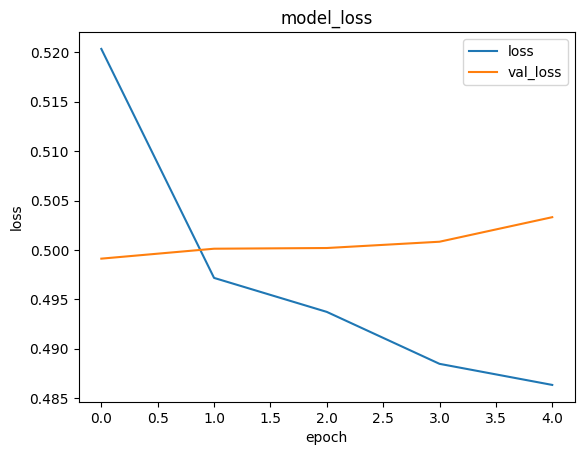

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [24]:
user_id = 'A0461265TOJ3VFHJUMY7'
books_watched_by_user = merged_df[merged_df.User_id == user_id]
books_not_watched = book_df[~book_df['Title'].isin(books_watched_by_user.Title.values)]['Title']

books_not_watched = list(set(books_not_watched).intersection(set(book2book_encoded.keys())))

books_not_watched = [[book2book_encoded.get(x)] for x in books_not_watched]

user_encoder = user2user_encoded.get(user_id)

user_book_array = np.hstack(
    ([[user_encoder]] * len(books_not_watched), books_not_watched)
)

ratings = model.predict(user_book_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded2book.get(books_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("books with high ratings from user")
print("----" * 8)
top_books_user = (
    books_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .Title.values
)
book_df_rows = book_df[book_df["Title"].isin(top_books_user)]
for row in book_df_rows.itertuples():
    print(row.Title, ":", row.categories)

print("----" * 8)
print("Top 10 book recommendations")
print("----" * 8)
recommended_books = book_df[book_df["Title"].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.Title, ":", row.categories)

310/310 [==============================] - 1s 4ms/step
Showing recommendations for user: A0461265TOJ3VFHJUMY7
books with high ratings from user
--------------------------------
King Rat : ['Fiction']
--------------------------------
Top 10 book recommendations
--------------------------------
Lichens of North America : ['Nature']
Lilla Belle: The First Stages : ['Fiction']
Angel Unaware: A Touching Story of Love and Loss : ['Religion']
Bubble Gum, Bubble Gum : ['Juvenile Nonfiction']
SuperHero ABC : ['Juvenile Fiction']
His Princess: Love Letters from Your King : ['Religion']
Coldwater Revival: A Novel : ['Fiction']
Broken Heart on Hold: Surviving Separation : ['Religion']
Millennium Babe: The Prophecy : ['Fiction']
The World According to Humphrey : ['Juvenile Fiction']


In [19]:
model.save('Colab_User', save_format='tf')
model.save_weights('Colab_User_Weight', save_format='tf')

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(138933, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f89c00e8280>, 140229754181952), {}).
INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 1]), tf.float32, tf.int64, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f89c009f640>, 140229754132880), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(9909, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f89c00ca130>, 140229754118592), {}).
INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 1]), tf.float32, tf.int64, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f89c0067c70>, 140229754120832), {}).
INFO:tensorflo

INFO:tensorflow:Assets written to: Colab_User/assets


INFO:tensorflow:Assets written to: Colab_User/assets
